----------------------------------------------------
Input Data          
----------------------------------------------------

   country country_long                                               name  \
0      AFG  Afghanistan       Kajaki Hydroelectric Power Plant Afghanistan   
1      AFG  Afghanistan      Mahipar Hydroelectric Power Plant Afghanistan   
2      AFG  Afghanistan   Naghlu Dam Hydroelectric Power Plant Afghanistan   
3      AFG  Afghanistan  Nangarhar (Darunta) Hydroelectric Power Plant ...   
4      AFG  Afghanistan            Northwest Kabul Power Plant Afghanistan   
5      AFG  Afghanistan  Pul-e-Khumri Hydroelectric Power Plant Afghani...   
6      AFG  Afghanistan   Sarobi Dam Hydroelectric Power Plant Afghanistan   
7      ALB      Albania                                         Bistrica 1   
8      ALB      Albania                                             Fierza   
9      ALB      Albania                                              Koman   
10     ALB    

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    2
8    2
9    2
Name: country, dtype: int32
----------------------------------------------------
Data Splitting          
----------------------------------------------------

Total no of data's       : 29910

Total no of Train data's : 20937

Total no of Test data's  : 8973
----------------------------------------
K NEAREST NEIGHBOUR --> KNN
------------------------------------

1. Accuracy           = 97.41026020518674 %

2. Mean Absolute Error =  357.84203250393233

3. Mean Squared Error =  2.589739794813255

----------------------------------------
 GRADIENT BOOSTING REGRESSOR 
------------------------------------

1. Accuracy           = 94.44761893800064 %

2. Mean Absolute Error =  273.34725527175596

3. Mean Squared Error =  5.55238106199936



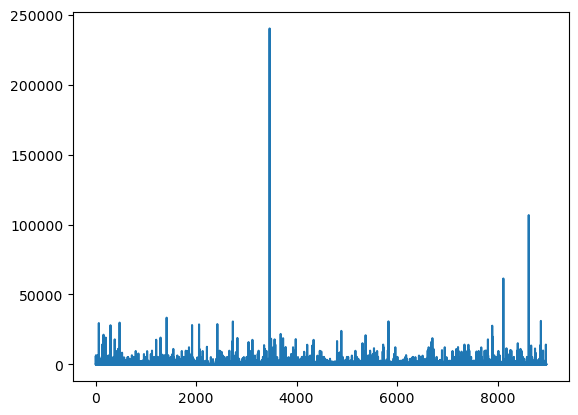

----------------------------------------------------
Prediction ---> Census Income 
----------------------------------------------------


-----------------------------

[0] The Energy =  5475.632018355741
-----------------------------

[1] The Energy =  1.3097835995771174
-----------------------------

[2] The Energy =  1363.5133237404868
-----------------------------

[3] The Energy =  28.50499391030038
-----------------------------

[4] The Energy =  80.58542097583248
-----------------------------

[5] The Energy =  1.3097835995771174
-----------------------------

[6] The Energy =  69.5730664291383
-----------------------------

[7] The Energy =  534.6701277892745
-----------------------------

[8] The Energy =  180.91854582153567
-----------------------------

[9] The Energy =  367.3146125677867


In [1]:
#============================= IMPORT LIBRARIES =============================

import pandas as pd
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

#============================= DATA SELECTION ==============================
dataframe=pd.read_csv("global_power_plant_database.csv")

print("----------------------------------------------------")
print("Input Data          ")
print("----------------------------------------------------")
print()
print(dataframe.head(20))


#============================= PREPROCESSING ==============================

#==== checking missing values ====

print("----------------------------------------------------")
print(" Before Checking Missing Values          ")
print("----------------------------------------------------")
print()
print(dataframe.isnull().sum())

print("----------------------------------------------------")
print("After checking Missing Values          ")
print("----------------------------------------------------")
print()
dataframe=dataframe.fillna(0)
print(dataframe.isnull().sum())

#==== LABEL ENCODING ====

label_encoder = preprocessing.LabelEncoder() 
print("------------------------------------------------------")
print(" Before label encoding")
print("------------------------------------------------------")
print()
print(dataframe['country'].head(10))

print("------------------------------------------------------")
print(" After label encoding")
print("------------------------------------------------------")
print()

dataframe['country']=label_encoder.fit_transform(dataframe['country'])
dataframe['country_long']=label_encoder.fit_transform(dataframe['country_long'])
dataframe['name']=label_encoder.fit_transform(dataframe['name'])

dataframe['gppd_idnr']=label_encoder.fit_transform(dataframe['gppd_idnr'])
dataframe['primary_fuel']=label_encoder.fit_transform(dataframe['primary_fuel'])
dataframe['source']=label_encoder.fit_transform(dataframe['source'].astype(str))

dataframe['other_fuel1']=label_encoder.fit_transform(dataframe['other_fuel1'].astype(str))

dataframe['other_fuel2']=label_encoder.fit_transform(dataframe['other_fuel2'].astype(str))

dataframe['other_fuel3']=label_encoder.fit_transform(dataframe['other_fuel3'].astype(str))


dataframe['wepp_id']=label_encoder.fit_transform(dataframe['wepp_id'].astype(str))



dataframe['geolocation_source']=label_encoder.fit_transform(dataframe['geolocation_source'].astype(str))

print(dataframe['country'].head(10))

# == drop unwanted columns==

dataframe=dataframe.drop(['url','owner'],axis=1)



#========================= DATA SPLITTING ==============================

print("----------------------------------------------------")
print("Data Splitting          ")
print("----------------------------------------------------")
print()

from sklearn.model_selection import train_test_split

X = dataframe.drop('estimated_generation_gwh', axis=1)
y = dataframe['estimated_generation_gwh']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print("Total no of data's       :",dataframe.shape[0])
print()
print("Total no of Train data's :",X_train.shape[0])
print()
print("Total no of Test data's  :",X_test.shape[0])

# === K NEAREST NEIGHBOUR =====


from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
 
# fit the regressor with x and y data
knn.fit(X_train, y_train) 

Y_pred_knn = knn.predict(X_test)

from sklearn import metrics

mae_knn=metrics.mean_absolute_error(y_test,Y_pred_knn) 

mse_knn=metrics.mean_squared_log_error(y_test, Y_pred_knn)

Accuracy_knn=100-mse_knn

print("----------------------------------------")
print("K NEAREST NEIGHBOUR --> KNN")
print("------------------------------------")
print()
print("1. Accuracy           =",Accuracy_knn,'%' )
print()
print("2. Mean Absolute Error = ", mae_knn)
print()
print("3. Mean Squared Error = ", mse_knn)
print()

#========================= CLASSIFICATION ==============================



from sklearn.ensemble import GradientBoostingRegressor

gbt = GradientBoostingRegressor()

gbt.fit(X_train, y_train)

y_pred_gbt = gbt.predict(X_test)

from sklearn import metrics

mae_gb=metrics.mean_absolute_error(y_test,y_pred_gbt) 

y_pred_gbt=abs(y_pred_gbt)

mse_gb=metrics.mean_squared_log_error(y_test, y_pred_gbt)

Accuracy_gb=100-mse_gb

print("----------------------------------------")
print(" GRADIENT BOOSTING REGRESSOR ")
print("------------------------------------")
print()
print("1. Accuracy           =",Accuracy_gb,'%' )
print()
print("2. Mean Absolute Error = ", mae_gb)
print()
print("3. Mean Squared Error = ", mse_gb)
print()


# =================== FORECASTING GRAPH ===============

import matplotlib.pyplot as plt
plt.plot(y_pred_gbt) 
plt.show() 


#========================= PREDICTION ==============================

print("----------------------------------------------------")
print("Prediction ---> Census Income ")
print("----------------------------------------------------")
print()
print()


for i in range(0,10):
        print("-----------------------------")
        print()
        print([i],"The Energy = ",y_pred_gbt[i])
